In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文显示
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

from sklearn.preprocessing import StandardScaler

# 1. 读取数据

In [13]:
# 读取csv 文件并指定数据类型呢
file_path = '../../data/周一所获数据/所有学员的学习总时长ms.csv'
df = pd.read_csv(file_path, dtype={'trainingPersonId': 'string', 'totalDuration': 'float64'})

# 查看数据
df.dtypes

trainingPersonId    string[python]
totalDuration              float64
dtype: object

# 2. 数据清洗
类型转换在读取 csv 文件时已经完成，这里不需要再次转换。
### (1) 单位转换


In [14]:
# 将毫秒转换为分钟
df['totalDuration'] = df['totalDuration'] / 1000 / 60 / 60

In [15]:
df.describe()

,totalDuration
count,11330.000000
mean,39.105407
std,40.479900
min,0.007270
25%,8.548387
50%,32.853693
75%,53.481157
max,476.472753


### 绘制概率密度直方图

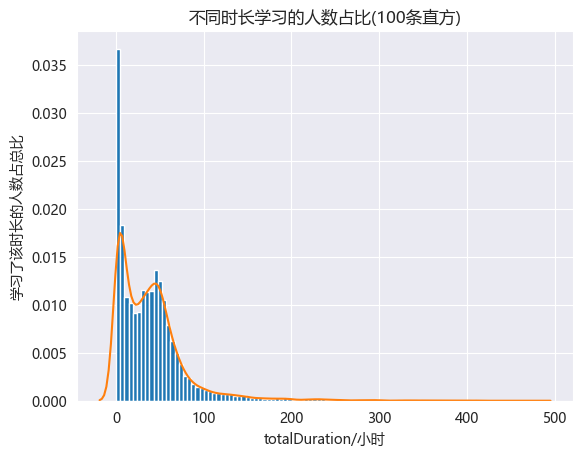

In [16]:
plt.hist(df['totalDuration'], density = True,bins=100)

sns.kdeplot(df['totalDuration'],label = '密度图')

plt.title("不同时长学习的人数占比(100条直方)")
plt.xlabel('totalDuration/小时')
plt.ylabel('学习了该时长的人数占总比')

# plt.savefig('../../imgs/所有学员的学习时长-概率分布图.png', dpi=800, bbox_inches='tight', pad_inches=1)
plt.show()

### 尝试将数据进行标准化缩放，再绘制试试
学习时长数据经过 Standard 缩放会出现负数值,这对于机器学习模型来说意义不大。

In [27]:
df['totalDuration'].values.dtypes

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [28]:
scaler = StandardScaler()
# Series.values 将 Series 转换为 numpy 数组
train_x = scaler.fit_transform(df['totalDuration'].values.reshape(-1,1))

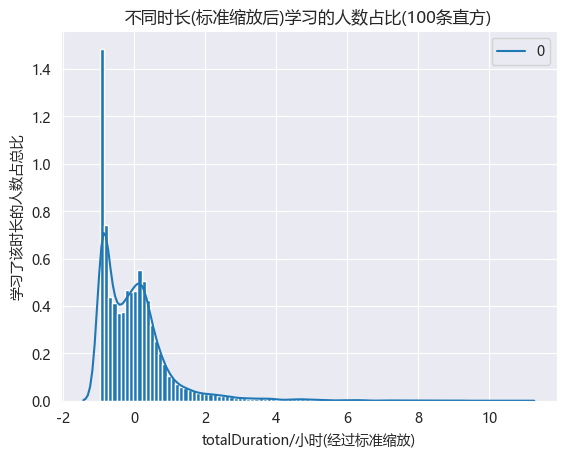

In [30]:
plt.hist(train_x, density = True,bins=100)
sns.kdeplot(train_x,label = '密度图')

plt.title("不同时长(标准缩放后)学习的人数占比(100条直方)")
plt.xlabel('totalDuration/小时(经过标准缩放)')
plt.ylabel('学习了该时长的人数占总比')

# plt.savefig('../../imgs/所有学员的学习时长-概率分布图.png', dpi=800, bbox_inches='tight', pad_inches=1)
plt.show()

### (2) 排序


In [16]:
# 按照学习总时长降序排列
df = df.sort_values(by='totalDuration', ascending=False)

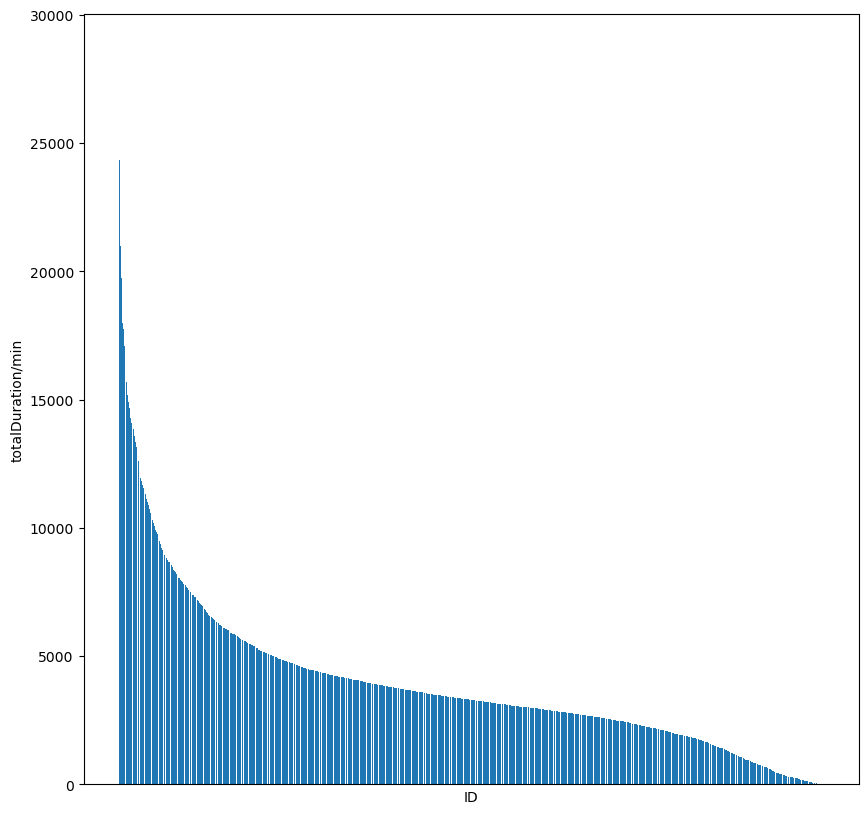

In [23]:
# 要求图表中只有 1 行 1 列子图，并且设置图表的大小为 10 * 10
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

num_elements = 5000
total_rows = df.shape[0]

# 绘制柱状图，ID 取前 5 个字母就行
ax.bar(df.tail(total_rows).trainingPersonId.str.slice(0, 3),
       df.tail(total_rows).totalDuration)

# 设置标题
ax.set_xlabel('ID')
ax.set_ylabel('totalDuration/min')

# 不显示设置x轴标签
plt.xticks([])

# 设置 y 轴刻度精度
# plt.yticks(np.arange(0, 100, 5))

# plt.savefig('../../imgs/所有学员的学习时长2-6.png', dpi=800, bbox_inches='tight', pad_inches=1)
plt.show()

---
# 绘制正态分布图
上图为直方图, x 轴表示一个个独立的用户; y 轴表示学习总时长。直方图的高度表示当前用户的总学习时长.可以观察到学习时间特别长的用户数和学习时间特别短的用户数都很少(x轴区间较窄)  

下图为正态分布图, x 轴表示学习总时长; y 轴表示学习总时长的频数。可以看到学习总时长的分布情况。


In [18]:
# todo
# 1.将数据按分钟数分组，记录每个分钟的频度
# 2.绘制新的直方图,该直方图符合正态分布 A
# 3.计算 A 的均值和方差，计算「每个分钟频度」的标准化变量 z = (x_i - 均值) / 方差

# 使用正态分布的意义在于,3σ之外（99.7%之外）的数据可以看作离群点。可是数据已经按照学习总时长排序，直接截取前 0.3% 的数据即可。 

--- 
# 补充异常点的图表

In [51]:
sus_id = pd.read_csv("../../data/各种来源的可疑ID（可作为标签）/使用可疑OPENID验证学员（去重）.csv")

In [63]:
# 创建颜色标签列，默认为蓝色，可疑用户的学习时长 bar 是红色
## 1 抽取 id 列
id_cols = df[['trainingPersonId']]
## 2 创建新列 color，默认为蓝色，可疑用户的学习时长 bar 是红色
color_labels = id_cols.assign(color=np.where(id_cols['trainingPersonId'].isin(sus_id.students), 'red', 'blue'))
## 3 转换 color 列的数据类型为 string
color_labels['color'] = color_labels['color'].astype('string')

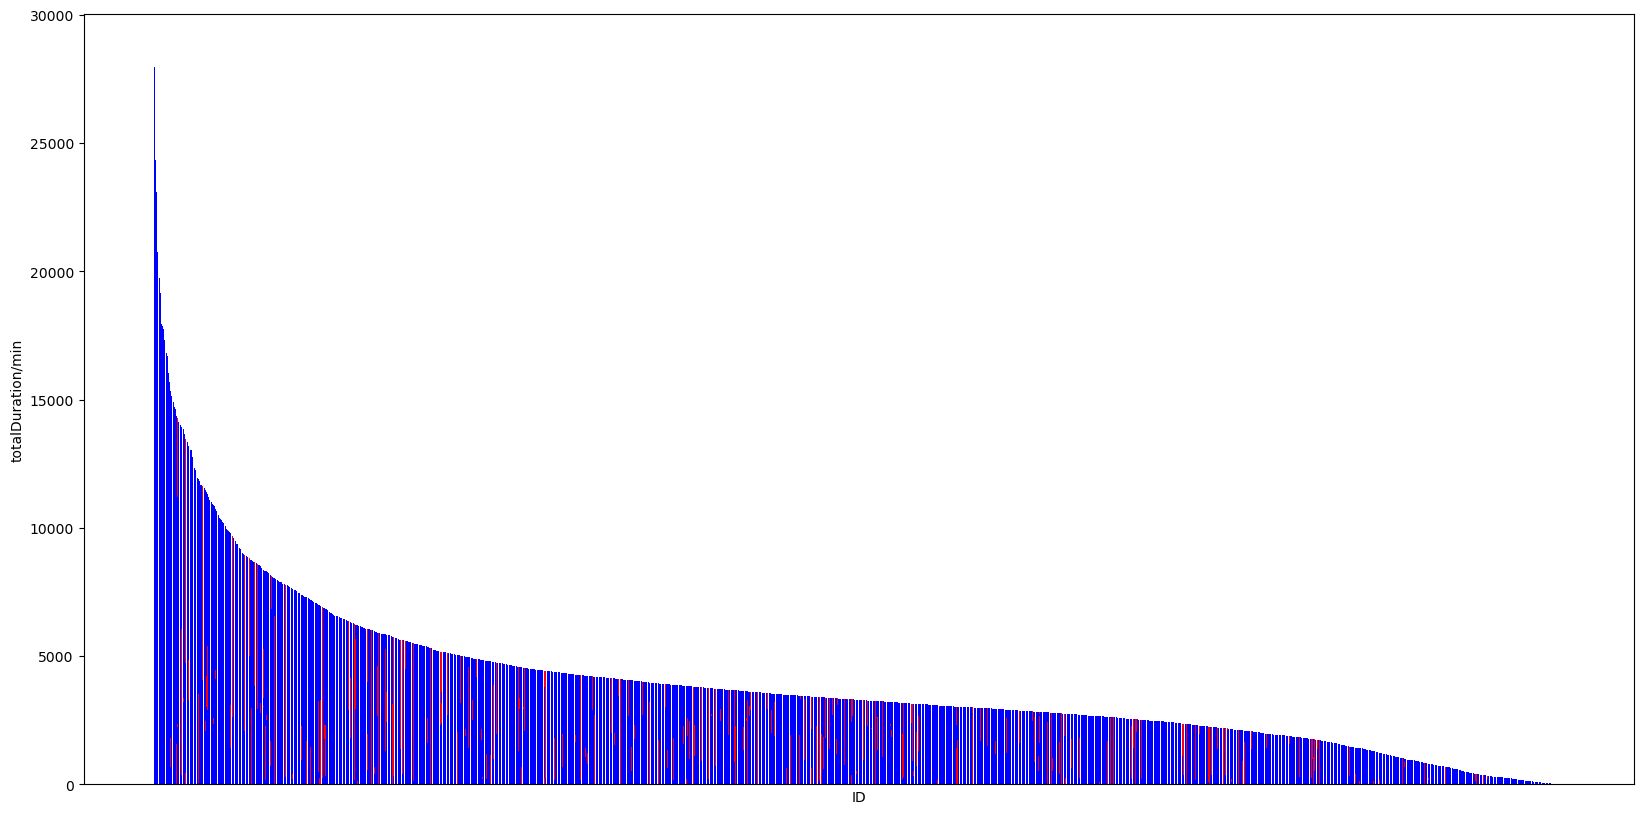

In [69]:
# 要求图表中只有 1 行 1 列子图，并且设置图表的大小为 10 * 10
f1, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

# 排序 df
df = df.sort_values(by='totalDuration', ascending=False)
# 让颜色标签和 df 匹配
color_labels = color_labels.reindex(df.index)

# 绘制柱状图，ID 取前 5 个字母就行
ax2.bar(df.trainingPersonId.str.slice(0, 3),
       df.totalDuration,
        color=color_labels['color'])


# ax2.bar(suspicious_rows.students,
#         suspicious_rows.totalDuration,
#         color='red')

# 设置标题
ax2.set_xlabel('ID')
ax2.set_ylabel('totalDuration/min')

# 不显示设置x轴标签
plt.xticks([])

# 设置 y 轴刻度精度
# plt.yticks(np.arange(0, 100, 5))

plt.savefig('../../imgs/所有学员的学习时长2-6-2(携带异常情况).png', dpi=800, bbox_inches='tight', pad_inches=1)
plt.show()